## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.

2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.

3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.


### 1. 라이브러리 및 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_path = '/content/drive/MyDrive/starbucks-customer-data/'
transcript = pd.read_csv(base_path+'transcript.csv')
profile = pd.read_csv(base_path+'profile.csv')
portfolio= pd.read_csv(base_path+'portfolio.csv')

In [9]:
# 불필요한 칼럼지우기
transcript=transcript.drop(columns=["Unnamed: 0"])
profile=profile.drop(columns=["Unnamed: 0"])
protfolio=portfolio.drop(columns=["Unnamed: 0"])

---

### 2. 데이터 전처리

In [11]:
# 데이터 결측치 찾아서 처리하기
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [12]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [13]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


 profile의 'gender' ,'income' 칼럼에 대해서만 결측치가 *존재*

In [ ]:
# profile 데이터의 'gender' ,'income' 칼럼 살펴보기

In [21]:
profile[profile.isnull().any(axis=1)]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


gender는 'Nan'이고 'age'은 118이고 income 'nan'이다. \
즉, 데이터상의 오류로 판단하고 제외시켜주는 것이 좋을 듯하다.

In [23]:
profile=profile.dropna()
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


### 3. Profile의 데이터분석

In [26]:
#profile의 became_member_on 데이터를 시간 정보로 변환해주도록 한다.
profile['became_member_on']= pd.to_datetime(profile['became_member_on'].astype(str), format='%Y%m%d')

#시간 정보로 변환하는 함수 pd.to_datetime(DataFrame['column'].astype(str), format='%Y%m%d' )

In [28]:
profile

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0


M    8484
F    6129
O     212
Name: gender, dtype: int64


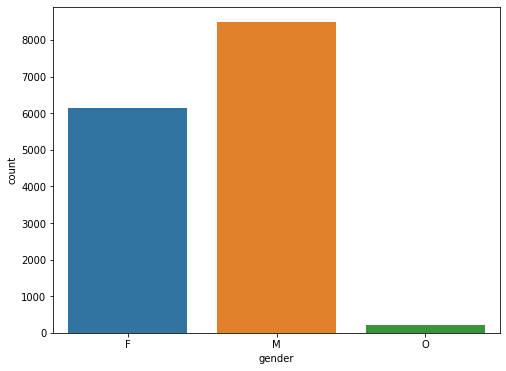

In [32]:
# 성별 분석
print(profile['gender'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=profile, x='gender')
plt.show()

남성은 8484명 여성은 6129명 트랜스나 식별불가는 212명이다.
남성 고객이 가장 많이 이벤트에 참여한 것을 파악할 수 있다.

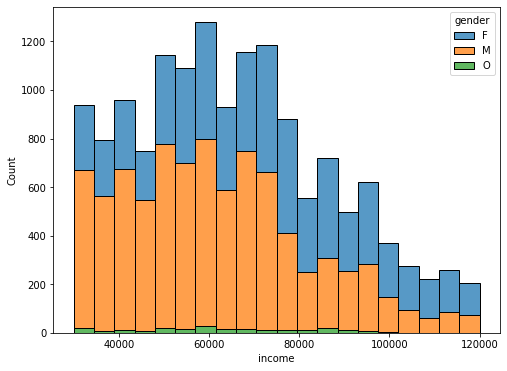

In [37]:
# 수입 분석
plt.figure(figsize=(8,6))
sns.histplot(data=profile, x='income',bins=20, hue='gender',multiple='stack')
plt.show()

수입은 6~7만 달러에서 가장많이 분포가 나왔음을 알 수 있다.\
8만달러 이후부터는 여성의 수입이 남성의 수입보다 많았다.

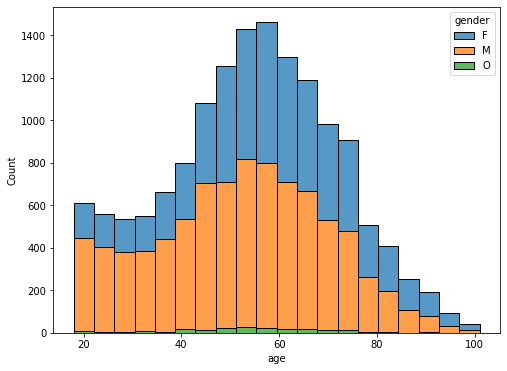

In [41]:
# 나이분석
plt.figure(figsize=(8,6))
sns.histplot(data=profile, x='age', hue='gender',multiple='stack', bins=20)
plt.show()

이벤트 참여 고객은 50대에서 70대가 가장 많았고, 비중은 여성이 더 많이 차지 하였다.

In [43]:
pd.pivot_table(data=profile, index='gender', values=['income','age'])

,age,income
gender,,
F,57.544950,71306.412139
M,52.116690,61194.601603
O,54.400943,63287.735849


이벤트 참여 고객의 남성의 평균 연령은 57세 수입은 약 7만 달러이다. \
여성의 평균 연령은 52세 수입은 약 6만 달러이다.

In [45]:
# 회원가입 날짜 분석
profile['join_year']= profile['became_member_on'].dt.year
profile['join_month']=profile.became_member_on.dt.month
profile

,gender,age,id,became_member_on,income,join_year,join_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


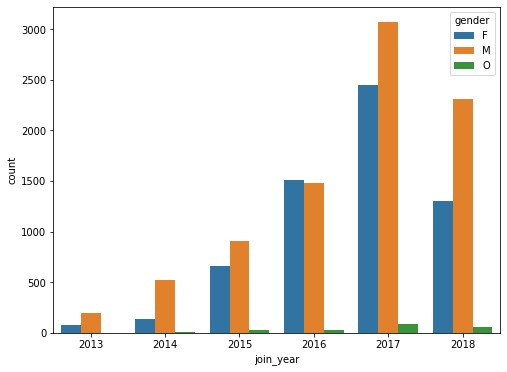

In [50]:
# 연도별 회원가입 수 측정
plt.figure(figsize=(8,6))
sns.countplot(data=profile, x='join_year', hue='gender')
plt.show()

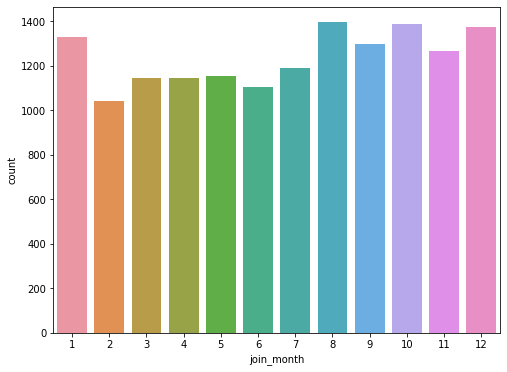

In [66]:
# 월별 회원가입 수 측정
plt.figure(figsize=(8,6))
sns.countplot(data=profile, x='join_month')
plt.show()

In [59]:
# 큰 데이터 별로 내림차순 정렬하는 방법
join_month_index=profile.join_month.value_counts().index
join_month_value=profile.join_month.value_counts().values

# profile.join_month.sort_values를 하게되면 전체데이터에 대해서 내림차순 정렬이 되므로 value_counts()후 재정렬 해준다.

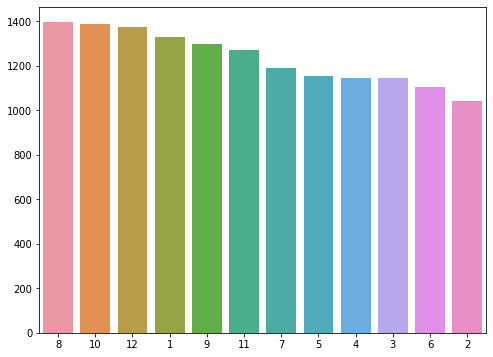

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(data=profile, x=join_month_index,y=join_month_value, order=join_month_index)
plt.show()

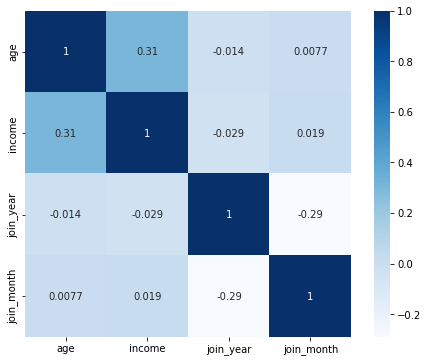

In [75]:
# profile 상관관계 분석
#profile.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=profile.corr(), square=True, cmap='Blues', annot=True)
plt.show()

-수입과 나이는 어느정도 연관성이 있다.\
-가입년도와 나이, 수입과는 연관이 없다.


### 4. Transcript에 대한 데이터분석

In [81]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64


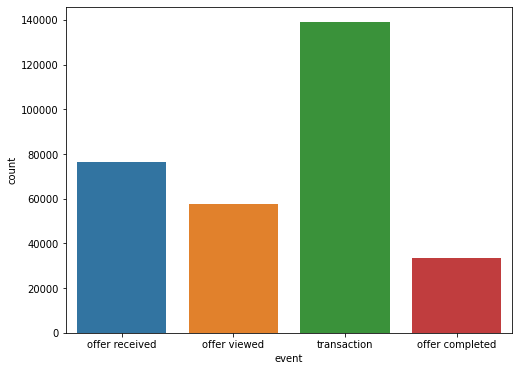

In [84]:
print(transcript.event.value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=transcript, x='event')
plt.show()


이벤트로 인해 거래까지 성사된 경우가 30만건 중에 14만건 정도 된다.\
보기만 한 정도는 약 6만건, 제안받기까지는 약 8만건, 제안 완성까지는 3만건

---

408    17030
576    17015
504    16822
336    16302
168    16150
0      15561
Name: time, dtype: int64


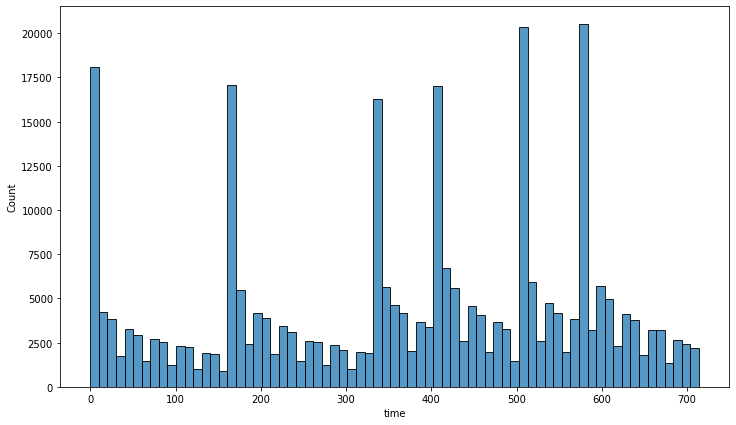

In [110]:
# time에 대한 분석
print(transcript['time'].value_counts()[:6])
plt.figure(figsize=(12,7))
sns.histplot(data=transcript, x='time')
plt.show()

일정시간대에서 이벤트 참여율이 높다.\
이것은 어떠한 원인으로 인해 참여가 높아지다가 점차 낮아지는 것으로 볼 수 있다.

In [99]:
temp=sorted(transcript.time.value_counts()[:6].index)
print(temp)
for i in range(len(temp)-1):
  print(temp[i+1]-temp[i], end=' ')

[0, 168, 336, 408, 504, 576]
168 168 72 96 72 

이벤트가 시작하고 7일 후 14일 후 21일 후 24일 후에 참여율이 높은 것으로 보아 이 때마다 이벤트를 재개하였다는 것으로 추측할 수 있다.

In [104]:
temp_df = transcript.loc[transcript['time'].isin(temp),:]
temp_df

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
262132,08eb126ad33f447ca3ad076482445c05,transaction,{'amount': 16.93},576
262133,1b4df4b48bf64727a4c445909aea1251,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},576
262134,ff737c250d2343729ade04c4f6eb1001,transaction,{'amount': 4.78},576
262135,400d0536e8794cbb855b0d882d67cbda,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576


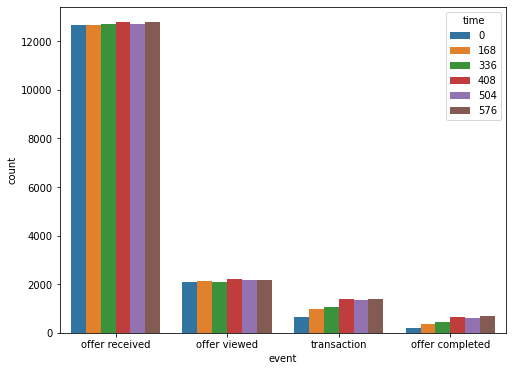

In [113]:
plt.figure(figsize=(8,6))
sns.countplot(data=temp_df, x='event', hue='time')
plt.show()

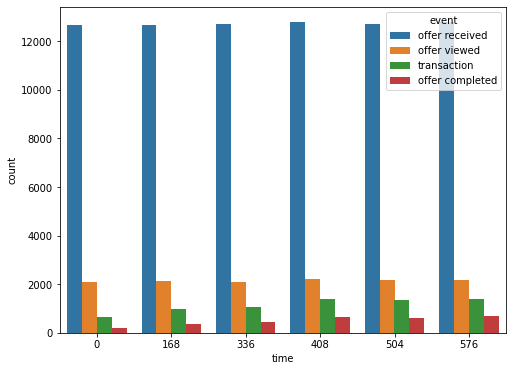

In [114]:
plt.figure(figsize=(8,6))
sns.countplot(data=temp_df, x='time', hue='event')
plt.show()

이벤트를 재개할 때마다 offer received는 높았으나 viewed를 넘어서 completed 까지 하는 것은 현저히 떨어지는 결과를 볼 수 있었다.

## 5. 분석 결론




스타벅스 이벤트 참여 고객설문조사

1.portfolio에 관한 분석결과

>이벤트에 참여한 남성은 총 8484명 여성은 총 6129명이다.
연도별 스타벅스 이벤트 참여인원은 2016년도를 제외하고는 여성이 월등히 많았다.
이벤트 참여 고객은 50대에서 70대가 가장 많았으며, 여성 비중이 더 많았다.
참여 고객 남성의 평균 연령은 57세, 수입은 약 7만달러 여성 평균 연령은 52세 수입은 약 6만 달러이다.
상관분석 결과 수입과 나이는 어느정도 연관성이 있음을 보였으나, 참여년도와 나이,수입과는 연관이 없다.

2.Transcript에 관한 분석결과
>이벤트로 인해 거래까지 성사된 경우는 30만건 중 약 14만건 정도에 달한다
이벤트를 보기만 하고 창을 끈 유저는 6만명 정도밖에 안된다.

>일정 시간대에 이벤트 참여율이 매우 높은 것으로 결과가 도출되었는데, 이것은 이벤트의 재개로 인한
참여율 증대로 추측이 된다.
이벤트가 시작하고 7일 후 14일 후 21일 후 24일 후 참여율이 높았는데, 고정된 주기가 참여율에 영향을 주는 것으로
보이지는 않는다.

>이벤트를 재개할때마다 창을 보는 사람은 많았으나 실제로 이벤트를 온전히 참여하여 거래까지 성사된 경우는 극히 드물다.

3.전략기획
>50-70대 연령층을 대상으로 추가 이벤트를 기획하는 것이 좋을 것으로 판단된다.
또한 이벤트를 재개할 때 다음 창으로 넘어가는 비중이 높아질 수 있도록 마케팅 전략이 필요하다.
고정된 주기가 있는 것은 아닌 것으로 판단되나, 관련된 실험을 진행하여 주기가 참여에 대한 영향이 있는지 파악할 필요가 있다.